# RMSprop optimizer

RMSprop (Root Mean Square Propagation) is an optimization algorithm commonly used in training artificial neural networks (ANNs). It is particularly effective in scenarios where other optimization algorithms like vanilla stochastic gradient descent (SGD) may struggle due to problems such as vanishing or exploding gradients.

## Details of RMSprop Algorithm

RMSprop is an adaptive learning rate optimization algorithm proposed by Geoffrey Hinton in his course on Neural Networks for Machine Learning. The algorithm is designed to adaptively adjust the learning rates for different parameters during training.

Summary of how RMSprop works:

1. Compute Squared Gradients: RMSprop maintains a moving average of the squared gradients for each parameter. This is similar to AdaGrad but with a decaying average.

2. Update Parameters: The update rule adjusts the learning rate for each parameter based on the average of the squared gradients.

3. Adaptive Learning Rates: RMSprop divides the learning rate by the square root of the exponentially decaying average of squared gradients for each parameter. This helps to normalize the learning rates and overcome the problems of vanishing or exploding gradients.


## Pros of RMSprop optimizer

1. Adaptive Learning Rates: RMSprop adapts the learning rates for each parameter individually based on the magnitude of their gradients. This helps converge faster and more efficiently, especially in deep neural networks.

2. Stability: It helps to stabilize the learning process by mitigating the issues of vanishing and exploding gradients.

3. Simple Implementation: RMSprop is relatively easy to implement and widely used in practice.

## Cons of RMSprop optimizer

1. Hyperparameter Sensitivity: RMSprop, like other adaptive methods, has hyperparameters that need to be tuned, such as the learning rate and the decay rate. Improper tuning can lead to suboptimal performance.

2. Memory Usage: RMSprop maintains a moving average of squared gradients for each parameter, which can require additional memory, especially for large models with many parameters.


## References
- https://keras.io/api/optimizers/rmsprop/

In [1]:
from fashionmnist_model import FMM
import tensorflow as tf

In [2]:
# Load and preprocess the data
X_train, y_train, X_test, y_test = FMM.load_data()

In [3]:
# Reshape the data
X_train, X_test = FMM.reshape_data(X_train, X_test)

In [4]:
optimizer = tf.keras.optimizers.RMSprop()
model = FMM.create_model_v1()
print(f"Training with {optimizer.__class__.__name__} optimizer...")
history = FMM.compile_and_train(
    model, X_train, y_train, optimizer
)

Training with RMSprop optimizer...
Epoch 1/30


2024-02-22 21:57:28.520599: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


750/750 [==============================] - 8s 9ms/step - loss: 0.5365 - accuracy: 0.8064 - val_loss: 0.4039 - val_accuracy: 0.8533
Epoch 2/30
750/750 [==============================] - 7s 9ms/step - loss: 0.3824 - accuracy: 0.8605 - val_loss: 0.4039 - val_accuracy: 0.8507
Epoch 3/30
750/750 [==============================] - 6s 8ms/step - loss: 0.3430 - accuracy: 0.8755 - val_loss: 0.3505 - val_accuracy: 0.8787
Epoch 4/30
750/750 [==============================] - 7s 9ms/step - loss: 0.3222 - accuracy: 0.8814 - val_loss: 0.3341 - val_accuracy: 0.8807
Epoch 5/30
750/750 [==============================] - 6s 8ms/step - loss: 0.3020 - accuracy: 0.8887 - val_loss: 0.3283 - val_accuracy: 0.8879
Epoch 6/30
750/750 [==============================] - 6s 8ms/step - loss: 0.2900 - accuracy: 0.8941 - val_loss: 0.3921 - val_accuracy: 0.8685
Epoch 7/30
750/750 [==============================] - 6s 9ms/step - loss: 0.2800 - accuracy: 0.8966 - val_loss: 0.3268 - val_accuracy: 0.8894
Epoch 8/30
750/75

313/313 - 2s - loss: 0.6033 - accuracy: 0.8822 - 2s/epoch - 7ms/step

Training accuracy : 0.9353125095367432
Validation accuracy : 0.8894166946411133
Loss : 0.6032505631446838
Accuracy : 0.8822000026702881



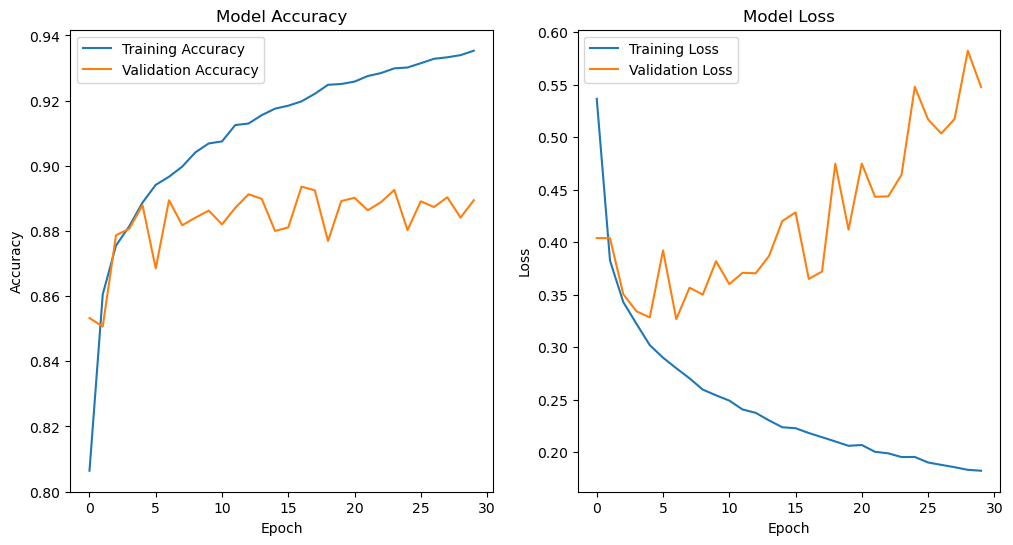

In [5]:
FMM.evaluate(model, X_test, y_test, history)
FMM.plot_history(history)

The trend shows that the training loss is increasing over time, while the validation loss is decreasing. This suggests that the model is overfitting the training data.

# Hyperparameter tunning

In [6]:
import ray
from ray import tune, train

# ! pip install -U "ray[data,train,tune,serve]"

In [7]:
ray.init()

2024-02-22 22:01:10,732	INFO worker.py:1715 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8266 


Python version:,3.11.5
Ray version:,2.9.2
Dashboard:,http://127.0.0.1:8266


In [8]:
# Define a function to train the model
def train_model(config):
    from fashionmnist_model import FMM
    import tensorflow as tf
    
    X_train, y_train, X_test, y_test = FMM.load_data()
    X_train, X_test = FMM.reshape_data(X_train, X_test)

    optimizer = tf.keras.optimizers.RMSprop(
        learning_rate=config["learning_rate"],
        # rho=config["rho"],
        # epsilon=config["epsilon"],
        # weight_decay=config["weight_decay"],
    )

    model = FMM.create_model_v1()
    history = FMM.compile_and_train(
        model, X_train, y_train, optimizer
    )
    
    loss, accuracy, _, _ = FMM.evaluate(model, X_test, y_test, history)

    train.report({"accuracy": accuracy, "loss": loss, **config})

In [9]:
search_space = {
    "learning_rate": tune.grid_search([0.001, 0.0005, 0.0001]),
    # "rho": tune.grid_search([0.9, 0.95, 0.99]),
    # "epsilon": tune.grid_search([1e-8, 1e-7, 1e-6]),
    # "weight_decay": tune.grid_search([1e-6, 1e-5, 1e-4]),
}

In [10]:
# Run hyperparameter tuning
analysis = tune.run(
    train_model,
    config=search_space,
    metric="accuracy",
    mode="max",
)

2024-02-22 22:01:17,243	INFO tune.py:583 -- [output] This uses the legacy output and progress reporter, as Jupyter notebooks are not supported by the new engine, yet. For more information, please see https://github.com/ray-project/ray/issues/36949
(raylet) [2024-02-22 22:01:19,679 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 7851278336; capacity: 245107195904. Object creation will fail if spilling is required.


(raylet) [2024-02-22 22:01:29,685 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 7850934272; capacity: 245107195904. Object creation will fail if spilling is required.
(raylet) [2024-02-22 22:01:39,780 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 7850528768; capacity: 245107195904. Object creation will fail if spilling is required.
(raylet) [2024-02-22 22:01:49,874 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 7849869312; capacity: 245107195904. Object creation will fail if spilling is required.
(raylet) [2024-02-22 22:01:59,963 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 7848939520; capacity: 245107195904. Object creation

(train_model pid=78153) Epoch 1/30
  9/750 [..............................] - ETA: 4s - loss: 1.6304 - accuracy: 0.4514   


(train_model pid=78157) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.RMSprop` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.RMSprop`.


 88/750 [==>...........................] - ETA: 9s - loss: 0.8880 - accuracy: 0.6848 
(train_model pid=78157) Epoch 1/30
175/750 [======>.......................] - ETA: 7s - loss: 0.7465 - accuracy: 0.7343


(raylet) [2024-02-22 22:02:09,973 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 6771683328; capacity: 245107195904. Object creation will fail if spilling is required.
(train_model pid=78157) WARNING:absl:There is a known slowdown when using v2.11+ Keras optimizers on M1/M2 Macs. Falling back to the legacy Keras optimizer, i.e., `tf.keras.optimizers.legacy.RMSprop`.
(train_model pid=78157) 2024-02-22 22:02:07.575025: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


413/750 [===============>..............] - ETA: 4s - loss: 0.6068 - accuracy: 0.7820


(train_model pid=78156) WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.RMSprop` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.RMSprop`.


 51/750 [=>............................] - ETA: 9s - loss: 1.6900 - accuracy: 0.4933 


(train_model pid=78156) WARNING:absl:There is a known slowdown when using v2.11+ Keras optimizers on M1/M2 Macs. Falling back to the legacy Keras optimizer, i.e., `tf.keras.optimizers.legacy.RMSprop`.


159/750 [=====>........................] - ETA: 9s - loss: 1.2268 - accuracy: 0.6213


(train_model pid=78156) 2024-02-22 22:02:15.876994: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


583/750 [======================>.......] - ETA: 2s - loss: 0.5625 - accuracy: 0.7981
(train_model pid=78156) Epoch 1/30
497/750 [==================>...........] - ETA: 3s - loss: 0.8447 - accuracy: 0.7320


(raylet) [2024-02-22 22:02:19,984 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 6771224576; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 18s 19ms/step - loss: 0.5348 - accuracy: 0.8078 - val_loss: 0.4059 - val_accuracy: 0.8547
(train_model pid=78153) Epoch 2/30
750/750 [==============================] - 20s 19ms/step - loss: 0.7492 - accuracy: 0.7599 - val_loss: 0.5413 - val_accuracy: 0.8141
(train_model pid=78157) Epoch 2/30
702/750 [===========================>..] - ETA: 0s - loss: 0.5646 - accuracy: 0.8023


(raylet) [2024-02-22 22:02:29,985 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 6856208384; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 11s 15ms/step - loss: 0.3813 - accuracy: 0.8606 - val_loss: 0.3924 - val_accuracy: 0.8583
(train_model pid=78153) Epoch 3/30
750/750 [==============================] - 18s 18ms/step - loss: 0.5577 - accuracy: 0.8049 - val_loss: 0.4216 - val_accuracy: 0.8512
(train_model pid=78156) Epoch 2/30
750/750 [==============================] - 11s 15ms/step - loss: 0.4772 - accuracy: 0.8376 - val_loss: 0.4469 - val_accuracy: 0.8474
(train_model pid=78157) Epoch 3/30
114/750 [===>..........................] - ETA: 7s - loss: 0.4359 - accuracy: 0.8496


(raylet) [2024-02-22 22:02:40,073 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 6857154560; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 10s 14ms/step - loss: 0.3430 - accuracy: 0.8730 - val_loss: 0.3788 - val_accuracy: 0.8661
(train_model pid=78153) Epoch 4/30
750/750 [==============================] - 10s 14ms/step - loss: 0.3943 - accuracy: 0.8572 - val_loss: 0.4390 - val_accuracy: 0.8474
(train_model pid=78156) Epoch 3/30
750/750 [==============================] - 10s 13ms/step - loss: 0.4270 - accuracy: 0.8530 - val_loss: 0.4198 - val_accuracy: 0.8534
(train_model pid=78157) Epoch 4/30
137/750 [====>.........................] - ETA: 7s - loss: 0.4015 - accuracy: 0.8629


(raylet) [2024-02-22 22:02:50,163 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 6856994816; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 10s 13ms/step - loss: 0.3192 - accuracy: 0.8845 - val_loss: 0.3417 - val_accuracy: 0.8799
(train_model pid=78153) Epoch 5/30
750/750 [==============================] - 10s 13ms/step - loss: 0.3487 - accuracy: 0.8716 - val_loss: 0.3430 - val_accuracy: 0.8774
(train_model pid=78156) Epoch 4/30
750/750 [==============================] - 10s 14ms/step - loss: 0.3982 - accuracy: 0.8626 - val_loss: 0.4159 - val_accuracy: 0.8566
(train_model pid=78157) Epoch 5/30
112/750 [===>..........................] - ETA: 7s - loss: 0.3885 - accuracy: 0.8676


(raylet) [2024-02-22 22:03:00,258 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 7116152832; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 10s 13ms/step - loss: 0.3033 - accuracy: 0.8881 - val_loss: 0.3637 - val_accuracy: 0.8699
(train_model pid=78153) Epoch 6/30
750/750 [==============================] - 10s 13ms/step - loss: 0.3243 - accuracy: 0.8807 - val_loss: 0.3613 - val_accuracy: 0.8651
(train_model pid=78156) Epoch 5/30
750/750 [==============================] - 10s 13ms/step - loss: 0.3790 - accuracy: 0.8669 - val_loss: 0.3816 - val_accuracy: 0.8658
(train_model pid=78157) Epoch 6/30
106/750 [===>..........................] - ETA: 7s - loss: 0.3554 - accuracy: 0.8753


(raylet) [2024-02-22 22:03:10,350 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 7115857920; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 10s 13ms/step - loss: 0.2904 - accuracy: 0.8941 - val_loss: 0.3382 - val_accuracy: 0.8800
(train_model pid=78153) Epoch 7/30
750/750 [==============================] - 10s 14ms/step - loss: 0.3036 - accuracy: 0.8883 - val_loss: 0.3286 - val_accuracy: 0.8832
(train_model pid=78156) Epoch 6/30
185/750 [======>.......................] - ETA: 8s - loss: 0.2992 - accuracy: 0.8905


(raylet) [2024-02-22 22:03:20,445 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 7115304960; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 11s 15ms/step - loss: 0.3636 - accuracy: 0.8719 - val_loss: 0.3818 - val_accuracy: 0.8675
(train_model pid=78157) Epoch 7/30
750/750 [==============================] - 12s 15ms/step - loss: 0.2802 - accuracy: 0.8972 - val_loss: 0.3808 - val_accuracy: 0.8664
(train_model pid=78153) Epoch 8/30
750/750 [==============================] - 12s 16ms/step - loss: 0.2883 - accuracy: 0.8944 - val_loss: 0.3316 - val_accuracy: 0.8803
(train_model pid=78156) Epoch 7/30
520/750 [===================>..........] - ETA: 2s - loss: 0.3503 - accuracy: 0.8766 [repeated 2x across cluster]


(raylet) [2024-02-22 22:03:30,545 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 7115100160; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 11s 14ms/step - loss: 0.3503 - accuracy: 0.8761 - val_loss: 0.3683 - val_accuracy: 0.8714
(train_model pid=78157) Epoch 8/30
750/750 [==============================] - 10s 14ms/step - loss: 0.2707 - accuracy: 0.9010 - val_loss: 0.3360 - val_accuracy: 0.8867
(train_model pid=78153) Epoch 9/30
750/750 [==============================] - 10s 14ms/step - loss: 0.2729 - accuracy: 0.8997 - val_loss: 0.3468 - val_accuracy: 0.8758
(train_model pid=78156) Epoch 8/30
512/750 [===================>..........] - ETA: 2s - loss: 0.2573 - accuracy: 0.9056


(raylet) [2024-02-22 22:03:40,640 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 7114559488; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 10s 13ms/step - loss: 0.3386 - accuracy: 0.8797 - val_loss: 0.3636 - val_accuracy: 0.8727
(train_model pid=78157) Epoch 9/30
750/750 [==============================] - 10s 13ms/step - loss: 0.2609 - accuracy: 0.9049 - val_loss: 0.3606 - val_accuracy: 0.8839
(train_model pid=78153) Epoch 10/30
750/750 [==============================] - 10s 13ms/step - loss: 0.2612 - accuracy: 0.9039 - val_loss: 0.3343 - val_accuracy: 0.8854
(train_model pid=78156) Epoch 9/30
203/750 [=======>......................] - ETA: 11s - loss: 0.2511 - accuracy: 0.9065


(raylet) [2024-02-22 22:03:50,659 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 6038679552; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 13s 17ms/step - loss: 0.3297 - accuracy: 0.8828 - val_loss: 0.3453 - val_accuracy: 0.8777
(train_model pid=78157) Epoch 10/30
750/750 [==============================] - 14s 18ms/step - loss: 0.2538 - accuracy: 0.9062 - val_loss: 0.3926 - val_accuracy: 0.8769
(train_model pid=78153) Epoch 11/30
750/750 [==============================] - 14s 19ms/step - loss: 0.2506 - accuracy: 0.9072 - val_loss: 0.3255 - val_accuracy: 0.8879
(train_model pid=78156) Epoch 10/30
500/750 [===================>..........] - ETA: 3s - loss: 0.3225 - accuracy: 0.8861


(raylet) [2024-02-22 22:04:00,660 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 6038175744; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 12s 16ms/step - loss: 0.3206 - accuracy: 0.8861 - val_loss: 0.3431 - val_accuracy: 0.8802
(train_model pid=78157) Epoch 11/30
355/750 [=============>................] - ETA: 5s - loss: 0.3170 - accuracy: 0.8880


(raylet) [2024-02-22 22:04:10,757 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 6037803008; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 11s 15ms/step - loss: 0.2457 - accuracy: 0.9100 - val_loss: 0.3480 - val_accuracy: 0.8863
(train_model pid=78153) Epoch 12/30
750/750 [==============================] - 12s 16ms/step - loss: 0.2410 - accuracy: 0.9111 - val_loss: 0.3484 - val_accuracy: 0.8848
(train_model pid=78156) Epoch 11/30
750/750 [==============================] - 13s 18ms/step - loss: 0.3118 - accuracy: 0.8898 - val_loss: 0.3486 - val_accuracy: 0.8754
(train_model pid=78157) Epoch 12/30
 74/750 [=>............................] - ETA: 10s - loss: 0.3063 - accuracy: 0.8900


(raylet) [2024-02-22 22:04:20,763 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 6037581824; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 14s 19ms/step - loss: 0.2387 - accuracy: 0.9126 - val_loss: 0.3896 - val_accuracy: 0.8737
(train_model pid=78153) Epoch 13/30
750/750 [==============================] - 15s 20ms/step - loss: 0.2337 - accuracy: 0.9135 - val_loss: 0.3451 - val_accuracy: 0.8874
(train_model pid=78156) Epoch 12/30
669/750 [=========================>....] - ETA: 1s - loss: 0.3041 - accuracy: 0.8922


(raylet) [2024-02-22 22:04:30,775 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 6036242432; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 14s 19ms/step - loss: 0.3062 - accuracy: 0.8915 - val_loss: 0.3351 - val_accuracy: 0.8818
(train_model pid=78157) Epoch 13/30
750/750 [==============================] - 15s 20ms/step - loss: 0.2331 - accuracy: 0.9140 - val_loss: 0.3599 - val_accuracy: 0.8881
(train_model pid=78153) Epoch 14/30
107/750 [===>..........................] - ETA: 10s - loss: 0.2297 - accuracy: 0.9133


(raylet) [2024-02-22 22:04:40,798 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 6035099648; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 15s 20ms/step - loss: 0.2262 - accuracy: 0.9163 - val_loss: 0.3374 - val_accuracy: 0.8878
(train_model pid=78156) Epoch 13/30
750/750 [==============================] - 14s 19ms/step - loss: 0.2983 - accuracy: 0.8938 - val_loss: 0.3325 - val_accuracy: 0.8834
(train_model pid=78157) Epoch 14/30
472/750 [=================>............] - ETA: 3s - loss: 0.2163 - accuracy: 0.9190 [repeated 2x across cluster]


(raylet) [2024-02-22 22:04:50,896 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 6035144704; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 13s 18ms/step - loss: 0.2290 - accuracy: 0.9157 - val_loss: 0.4184 - val_accuracy: 0.8786
(train_model pid=78153) Epoch 15/30
750/750 [==============================] - 13s 17ms/step - loss: 0.2162 - accuracy: 0.9190 - val_loss: 0.3534 - val_accuracy: 0.8814
(train_model pid=78156) Epoch 14/30
479/750 [==================>...........] - ETA: 3s - loss: 0.2098 - accuracy: 0.9216


(raylet) [2024-02-22 22:05:00,914 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 6034767872; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 13s 18ms/step - loss: 0.2920 - accuracy: 0.8954 - val_loss: 0.3347 - val_accuracy: 0.8814
(train_model pid=78157) Epoch 15/30
750/750 [==============================] - 12s 16ms/step - loss: 0.2101 - accuracy: 0.9221 - val_loss: 0.3352 - val_accuracy: 0.8914 [repeated 2x across cluster]
(train_model pid=78156) Epoch 15/30 [repeated 2x across cluster]
513/750 [===================>..........] - ETA: 2s - loss: 0.2213 - accuracy: 0.9189 [repeated 3x across cluster]


(raylet) [2024-02-22 22:05:10,919 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 6034448384; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 11s 15ms/step - loss: 0.2860 - accuracy: 0.8975 - val_loss: 0.3279 - val_accuracy: 0.8829
(train_model pid=78157) Epoch 16/30
750/750 [==============================] - 12s 16ms/step - loss: 0.2188 - accuracy: 0.9195 - val_loss: 0.4283 - val_accuracy: 0.8855
(train_model pid=78153) Epoch 17/30
750/750 [==============================] - 12s 16ms/step - loss: 0.2033 - accuracy: 0.9244 - val_loss: 0.3476 - val_accuracy: 0.8920
(train_model pid=78156) Epoch 16/30
623/750 [=======================>......] - ETA: 1s - loss: 0.2768 - accuracy: 0.9006


(raylet) [2024-02-22 22:05:20,974 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 6079197184; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 14s 18ms/step - loss: 0.2805 - accuracy: 0.8995 - val_loss: 0.3242 - val_accuracy: 0.8863
(train_model pid=78157) Epoch 17/30
376/750 [==============>...............] - ETA: 4s - loss: 0.2766 - accuracy: 0.9005


(raylet) [2024-02-22 22:05:31,007 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 6078152704; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 13s 17ms/step - loss: 0.2140 - accuracy: 0.9209 - val_loss: 0.4342 - val_accuracy: 0.8839
(train_model pid=78153) Epoch 18/30
750/750 [==============================] - 13s 18ms/step - loss: 0.1972 - accuracy: 0.9268 - val_loss: 0.3369 - val_accuracy: 0.8893
(train_model pid=78156) Epoch 17/30
750/750 [==============================] - 11s 15ms/step - loss: 0.2759 - accuracy: 0.9020 - val_loss: 0.3242 - val_accuracy: 0.8863
(train_model pid=78157) Epoch 18/30
221/750 [=======>......................] - ETA: 8s - loss: 0.2655 - accuracy: 0.9056


(raylet) [2024-02-22 22:05:41,101 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 6090522624; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 12s 16ms/step - loss: 0.2138 - accuracy: 0.9238 - val_loss: 0.4490 - val_accuracy: 0.8791
(train_model pid=78153) Epoch 19/30
459/750 [=================>............] - ETA: 4s - loss: 0.2685 - accuracy: 0.9036
(train_model pid=78156) Epoch 18/30
750/750 [==============================] - 14s 18ms/step - loss: 0.2705 - accuracy: 0.9031 - val_loss: 0.3345 - val_accuracy: 0.8824
(train_model pid=78157) Epoch 19/30
  4/750 [..............................] - ETA: 21s - loss: 0.2759 - accuracy: 0.9141


(raylet) [2024-02-22 22:05:51,111 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 6090145792; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 12s 16ms/step - loss: 0.2084 - accuracy: 0.9255 - val_loss: 0.4869 - val_accuracy: 0.8857
(train_model pid=78153) Epoch 20/30
750/750 [==============================] - 12s 16ms/step - loss: 0.1847 - accuracy: 0.9319 - val_loss: 0.3514 - val_accuracy: 0.8918
(train_model pid=78156) Epoch 19/30
446/750 [================>.............] - ETA: 3s - loss: 0.1810 - accuracy: 0.9330


(raylet) [2024-02-22 22:06:01,209 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 6089183232; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 11s 14ms/step - loss: 0.2653 - accuracy: 0.9061 - val_loss: 0.3182 - val_accuracy: 0.8856
(train_model pid=78157) Epoch 20/30
750/750 [==============================] - 11s 15ms/step - loss: 0.2019 - accuracy: 0.9265 - val_loss: 0.4710 - val_accuracy: 0.8818
(train_model pid=78153) Epoch 21/30
750/750 [==============================] - 11s 14ms/step - loss: 0.1799 - accuracy: 0.9333 - val_loss: 0.3765 - val_accuracy: 0.8895
(train_model pid=78156) Epoch 20/30
 52/750 [=>............................] - ETA: 4s - loss: 0.2459 - accuracy: 0.9132


(raylet) [2024-02-22 22:06:11,241 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 7120936960; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 9s 12ms/step - loss: 0.2606 - accuracy: 0.9071 - val_loss: 0.3150 - val_accuracy: 0.8870
(train_model pid=78157) Epoch 21/30
750/750 [==============================] - 8s 10ms/step - loss: 0.2002 - accuracy: 0.9278 - val_loss: 0.4735 - val_accuracy: 0.8836
(train_model pid=78153) Epoch 22/30
750/750 [==============================] - 8s 10ms/step - loss: 0.1745 - accuracy: 0.9359 - val_loss: 0.3638 - val_accuracy: 0.8929
(train_model pid=78156) Epoch 21/30
750/750 [==============================] - 7s 10ms/step - loss: 0.2565 - accuracy: 0.9087 - val_loss: 0.3132 - val_accuracy: 0.8873
(train_model pid=78157) Epoch 22/30
400/750 [===============>..............] - ETA: 2s - loss: 0.2487 - accuracy: 0.9107


(raylet) [2024-02-22 22:06:21,244 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 7163469824; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 7s 9ms/step - loss: 0.1694 - accuracy: 0.9392 - val_loss: 0.3691 - val_accuracy: 0.8960 [repeated 2x across cluster]
(train_model pid=78156) Epoch 22/30 [repeated 2x across cluster]
750/750 [==============================] - 7s 10ms/step - loss: 0.1948 - accuracy: 0.9297 - val_loss: 0.4917 - val_accuracy: 0.8807 [repeated 2x across cluster]
(train_model pid=78153) Epoch 24/30 [repeated 2x across cluster]
 77/750 [==>...........................] - ETA: 6s - loss: 0.1622 - accuracy: 0.9424


(raylet) [2024-02-22 22:06:31,252 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 7163322368; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 8s 11ms/step - loss: 0.1655 - accuracy: 0.9396 - val_loss: 0.4040 - val_accuracy: 0.8949
(train_model pid=78156) Epoch 23/30
750/750 [==============================] - 8s 11ms/step - loss: 0.2476 - accuracy: 0.9123 - val_loss: 0.3246 - val_accuracy: 0.8849
(train_model pid=78157) Epoch 24/30
750/750 [==============================] - 8s 10ms/step - loss: 0.1618 - accuracy: 0.9398 - val_loss: 0.4013 - val_accuracy: 0.8941 [repeated 2x across cluster]
(train_model pid=78156) Epoch 24/30 [repeated 2x across cluster]
317/750 [===========>..................] - ETA: 3s - loss: 0.1983 - accuracy: 0.9272 [repeated 2x across cluster]


(raylet) [2024-02-22 22:06:41,344 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 7163244544; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 8s 10ms/step - loss: 0.1905 - accuracy: 0.9310 - val_loss: 0.5391 - val_accuracy: 0.8875 [repeated 2x across cluster]
(train_model pid=78153) Epoch 26/30 [repeated 2x across cluster]
750/750 [==============================] - 8s 11ms/step - loss: 0.1561 - accuracy: 0.9420 - val_loss: 0.4026 - val_accuracy: 0.8930
(train_model pid=78156) Epoch 25/30
750/750 [==============================] - 8s 11ms/step - loss: 0.2406 - accuracy: 0.9124 - val_loss: 0.3132 - val_accuracy: 0.8884
(train_model pid=78157) Epoch 26/30
671/750 [=========================>....] - ETA: 0s - loss: 0.1527 - accuracy: 0.9442


(raylet) [2024-02-22 22:06:51,355 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 7162236928; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 8s 11ms/step - loss: 0.1521 - accuracy: 0.9441 - val_loss: 0.4072 - val_accuracy: 0.8976 [repeated 2x across cluster]
(train_model pid=78156) Epoch 26/30 [repeated 2x across cluster]
750/750 [==============================] - 7s 10ms/step - loss: 0.1838 - accuracy: 0.9340 - val_loss: 0.5303 - val_accuracy: 0.8873 [repeated 2x across cluster]
(train_model pid=78153) Epoch 28/30 [repeated 2x across cluster]
671/750 [=========================>....] - ETA: 0s - loss: 0.1502 - accuracy: 0.9436 [repeated 2x across cluster]


(raylet) [2024-02-22 22:07:01,364 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 7162060800; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 7s 9ms/step - loss: 0.2332 - accuracy: 0.9145 - val_loss: 0.3160 - val_accuracy: 0.8867 [repeated 2x across cluster]
(train_model pid=78157) Epoch 28/30 [repeated 2x across cluster]
750/750 [==============================] - 7s 10ms/step - loss: 0.1450 - accuracy: 0.9464 - val_loss: 0.4187 - val_accuracy: 0.8897 [repeated 2x across cluster]
(train_model pid=78156) Epoch 28/30 [repeated 2x across cluster]
658/750 [=========================>....] - ETA: 0s - loss: 0.1840 - accuracy: 0.9353 [repeated 3x across cluster]


(raylet) [2024-02-22 22:07:11,460 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 7161860096; capacity: 245107195904. Object creation will fail if spilling is required.


750/750 [==============================] - 8s 11ms/step - loss: 0.1828 - accuracy: 0.9354 - val_loss: 0.5551 - val_accuracy: 0.8890 [repeated 2x across cluster]
(train_model pid=78153) Epoch 30/30 [repeated 2x across cluster]
750/750 [==============================] - 9s 12ms/step - loss: 0.1409 - accuracy: 0.9480 - val_loss: 0.4364 - val_accuracy: 0.8924
(train_model pid=78156) Epoch 29/30
750/750 [==============================] - 9s 11ms/step - loss: 0.2266 - accuracy: 0.9193 - val_loss: 0.3117 - val_accuracy: 0.8913
(train_model pid=78157) Epoch 30/30
158/750 [=====>........................] - ETA: 4s - loss: 0.2180 - accuracy: 0.9214


(raylet) [2024-02-22 22:07:21,559 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 7161786368; capacity: 245107195904. Object creation will fail if spilling is required.


692/750 [==========================>...] - ETA: 0s - loss: 0.1380 - accuracy: 0.9492 [repeated 2x across cluster]


Trial name,accuracy,learning_rate,loss
train_model_d00f2_00000,0.8871,0.001,0.624277
train_model_d00f2_00001,0.8872,0.0005,0.487521
train_model_d00f2_00002,0.8805,0.0001,0.339811


(train_model pid=78153) 313/313 - 2s - loss: 0.6243 - accuracy: 0.8871 - 2s/epoch - 7ms/step
(train_model pid=78153) 
(train_model pid=78153) Training accuracy : 0.9372291564941406
(train_model pid=78153) Validation accuracy : 0.8865000009536743
(train_model pid=78153) Loss : 0.624276876449585
(train_model pid=78153) Accuracy : 0.8870999813079834
(train_model pid=78153) 
750/750 [==============================] - 8s 10ms/step - loss: 0.1390 - accuracy: 0.9490 - val_loss: 0.4855 - val_accuracy: 0.8906 [repeated 2x across cluster]
(train_model pid=78156) Epoch 30/30
680/750 [==========================>...] - ETA: 0s - loss: 0.1345 - accuracy: 0.9510
(train_model pid=78157) 313/313 - 2s - loss: 0.3398 - accuracy: 0.8805 - 2s/epoch - 5ms/step
(train_model pid=78157) 
(train_model pid=78157) Training accuracy : 0.9212499856948853
(train_model pid=78157) Validation accuracy : 0.8882499933242798
(train_model pid=78157) Loss : 0.3398114740848541
(train_model pid=78157) Accuracy : 0.88050001859

(raylet) [2024-02-22 22:07:31,658 E 78016 534070] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-02-22_22-01-02_661666_66854 is over 95% full, available space: 8236990464; capacity: 245107195904. Object creation will fail if spilling is required.
2024-02-22 22:07:32,684	INFO tune.py:1042 -- Total run time: 375.44 seconds (365.70 seconds for the tuning loop).


440/750 [================>.............] - ETA: 2s - loss: 0.1334 - accuracy: 0.9510


In [11]:
ray.shutdown()

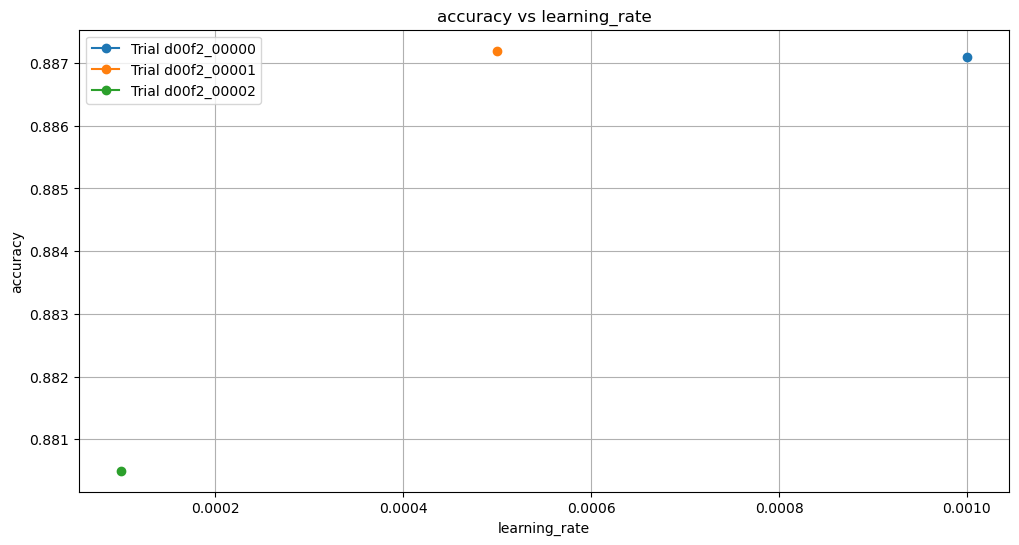

In [12]:
FMM.plot_analysis_results(analysis, x_axis="learning_rate", y_axis="accuracy")

In [13]:
# Print the best hyperparameters and results
best_config = analysis.best_config
print("Best hyperparameters:", best_config)
print("Best accuracy:", analysis.best_result["accuracy"])

Best hyperparameters: {'learning_rate': 0.0005}
Best accuracy: 0.8871999979019165


In [14]:
optimizer = tf.keras.optimizers.RMSprop(**best_config)
model = FMM.create_model_v1()
print(f"Training with {optimizer.__class__.__name__} optimizer...")
history = FMM.compile_and_train(
    model, X_train, y_train, optimizer
)

Training with RMSprop optimizer...
Epoch 1/30
750/750 [==============================] - 9s 10ms/step - loss: 0.5536 - accuracy: 0.8064 - val_loss: 0.4810 - val_accuracy: 0.8152
Epoch 2/30
750/750 [==============================] - 6s 9ms/step - loss: 0.3898 - accuracy: 0.8606 - val_loss: 0.3743 - val_accuracy: 0.8659
Epoch 3/30
750/750 [==============================] - 6s 9ms/step - loss: 0.3466 - accuracy: 0.8729 - val_loss: 0.3406 - val_accuracy: 0.8787
Epoch 4/30
750/750 [==============================] - 6s 8ms/step - loss: 0.3202 - accuracy: 0.8817 - val_loss: 0.3398 - val_accuracy: 0.8782
Epoch 5/30
750/750 [==============================] - 6s 8ms/step - loss: 0.2998 - accuracy: 0.8891 - val_loss: 0.3355 - val_accuracy: 0.8793
Epoch 6/30
750/750 [==============================] - 7s 9ms/step - loss: 0.2864 - accuracy: 0.8945 - val_loss: 0.3200 - val_accuracy: 0.8864
Epoch 7/30
750/750 [==============================] - 7s 9ms/step - loss: 0.2742 - accuracy: 0.8978 - val_loss: 

313/313 - 1s - loss: 0.4621 - accuracy: 0.8855 - 1s/epoch - 3ms/step

Training accuracy : 0.948645830154419
Validation accuracy : 0.890250027179718
Loss : 0.4620819687843323
Accuracy : 0.8855000138282776



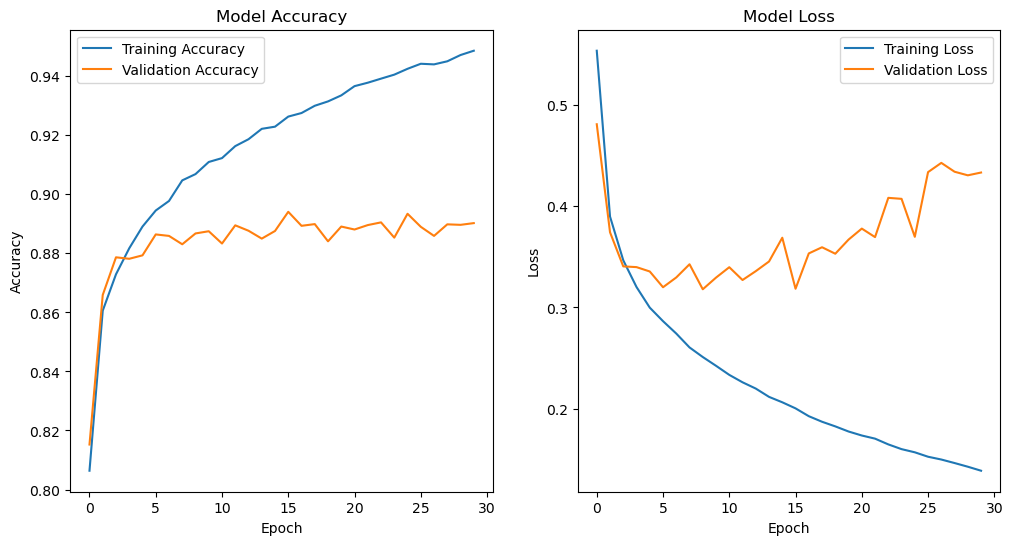

In [15]:
FMM.evaluate(model, X_test, y_test, history)
FMM.plot_history(history)